# Demo Notebook for Dataframe

#### [Download notebook](https://github.com/opensearch-project/opensearch-py-ml/blob/main/docs/source/examples/demo_notebook.ipynb)

## Step 0: Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# import this to stop opensearch-py-ml from yelling every time a DataFrame connection made
import warnings
warnings.filterwarnings('ignore')

In [4]:
# imports to demonstrate DataFrame support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opensearch_py_ml as oml
from opensearchpy import OpenSearch

# Import standard test settings for consistent results
from opensearch_py_ml.conftest import *

## Step 1: Setup clients

In [5]:
# CLUSTER_URL = 'https://localhost:9200'
CLUSTER_URL = 'default-opensearch-node1-0c190-1595032-15144b153298.kr-gov.lb.naverncp.com'

def get_os_client(cluster_url = CLUSTER_URL,
                  username='admin',
                  password='admin'):
    '''
    Get OpenSearch client
    :param cluster_url: cluster URL like https://ml-te-netwo-1s12ba42br23v-ff1736fa7db98ff2.elb.us-west-2.amazonaws.com:443
    :return: OpenSearch client
    '''
    client = OpenSearch(
        hosts = [{"host": "default-opensearch-node1-0c190-1595032-15144b153298.kr-gov.lb.naverncp.com", "port": 9200}],
        http_auth = ("admin", "admin"),
        use_ssl = True,
        verify_certs = False,
        ssl_assert_hostname = False,
        ssl_show_warn = False,
    )
    
    return client

In [6]:
client = get_os_client()

## Comparing similarities and differences between panda dataframe vs opensearch_py_ml dataframe

Create an opensearch_py_ml.DataFrame from a `flights` index

In [7]:
oml_biz_log = oml.DataFrame(client, 'biz_logs_v2')

In [8]:
type(oml_biz_log)

opensearch_py_ml.dataframe.DataFrame

Compare to pandas DataFrame (created from the same data)

In [15]:
pd_biz_log = oml.opensearch_to_pandas(oml_biz_log)

In [16]:
type(pd_biz_log)

pandas.core.frame.DataFrame

## Attributes and underlying data

### DataFrame.columns

In [16]:
pd_biz_log.columns

Index(['busi_cd', 'busi_dtl_contn', 'button_cd', 'dept_cd', 'emp_cd', 'hq_cd', 'inq_reason',
       'inq_seq', 'join_ssn', 'log_agency_cd', 'log_seq', 'org_cd', 'per_inf_cd', 'prg_id',
       'proc_date', 'proc_hour', 'proc_time', 'recv_no', 'recv_yyyy', 'req_url', 'sear_val',
       'sys_cd', 'user_id', 'user_ip', 'ykiho_cd'],
      dtype='object')

In [17]:
oml_biz_log.columns

Index(['busi_cd', 'busi_dtl_contn', 'button_cd', 'dept_cd', 'emp_cd', 'hq_cd', 'inq_reason',
       'inq_seq', 'join_ssn', 'log_agency_cd', 'log_seq', 'org_cd', 'per_inf_cd', 'prg_id',
       'proc_date', 'proc_hour', 'proc_time', 'recv_no', 'recv_yyyy', 'req_url', 'sear_val',
       'sys_cd', 'user_id', 'user_ip', 'ykiho_cd'],
      dtype='object')

### DataFrame.dtypes

In [18]:
pd_biz_log.dtypes

busi_cd            object
busi_dtl_contn     object
button_cd          object
dept_cd            object
emp_cd            float64
                   ...   
sear_val           object
sys_cd             object
user_id           float64
user_ip            object
ykiho_cd           object
Length: 25, dtype: object

In [19]:
oml_biz_log.dtypes

busi_cd           object
busi_dtl_contn    object
button_cd         object
dept_cd           object
emp_cd            object
                   ...  
sear_val          object
sys_cd            object
user_id           object
user_ip           object
ykiho_cd          object
Length: 25, dtype: object

### DataFrame.select_dtypes

In [20]:
pd_biz_log.select_dtypes(include=np.number)

,emp_cd,inq_seq,...,proc_time,user_id
0,20150068.0,6626256.0,...,36.0,20150068.0
1,20150068.0,6626255.0,...,35.0,20150068.0
2,20150068.0,6626254.0,...,38.0,20150068.0
3,20150068.0,6626253.0,...,36.0,20150068.0
4,20162405.0,6626379.0,...,21.0,20162405.0
...,...,...,...,...,...
7780,20060107.0,27124648.0,...,50.0,20060107.0
7781,19930011.0,27124647.0,...,32.0,19930011.0
7782,19930011.0,27124646.0,...,37.0,19930011.0
7783,19930011.0,27124645.0,...,35.0,19930011.0


In [21]:
oml_biz_log.select_dtypes(include=np.number)

""
0
1
2
3
4
...
7780
7781
7782
7783


### DataFrame.empty

In [22]:
pd_biz_log.empty

False

In [23]:
oml_biz_log.empty

False

### DataFrame.shape

In [24]:
pd_biz_log.shape

(7783, 25)

In [25]:
oml_biz_log.shape

(7783, 25)

### DataFrame.index

Note, `opensearch_py_ml.DataFrame.index` does not mirror `pandas.DataFrame.index`. 

In [26]:
pd_biz_log.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '7775', '7776', '7777', '7778', '7779', '7780', '7781', '7782', '7783', '7784'],
      dtype='object', length=7783)

In [27]:
# NBVAL_IGNORE_OUTPUT
oml_biz_log.index

In [28]:
oml_biz_log.index.os_index_field

'_id'

### DataFrame.values

Note, `opensearch_py_ml.DataFrame.values` is not supported.

In [29]:
pd_biz_log.values

array([['2', '1498', 'R', ..., 20150068.0, '10.1.72.55', ''],
       ['2', '', 'R', ..., 20150068.0, '10.1.72.55', ''],
       ['2', '', 'R', ..., 20150068.0, '10.1.72.55', ''],
       ...,
       ['', '', 'R', ..., 19930011.0, '10.6.1.104', '34343288'],
       ['', '', 'R', ..., 19930011.0, '10.6.1.104', '34343288'],
       ['1', '', 'R', ..., 20162405.0, '10.100.4.66', '']], dtype=object)

In [30]:
try:
    oml_biz_log.values
except AttributeError as e:
    print(e)

This method would scan/scroll the entire OpenSearch index(s) into memory. If this is explicitly required, and there is sufficient memory, call `oml.opensearch_to_pandas(oml_df).values`


## Indexing, iteration

### DataFrame.head

In [31]:
pd_biz_log.head()

,busi_cd,busi_dtl_contn,...,user_ip,ykiho_cd
0,2,1498,...,10.1.72.55,
1,2,,...,10.1.72.55,
2,2,,...,10.1.72.55,
3,2,,...,10.1.72.55,
4,1,invision,...,10.100.4.66,


In [32]:
oml_biz_log.head()

,busi_cd,busi_dtl_contn,...,user_ip,ykiho_cd
0,2,1498,...,10.1.72.55,
1,2,,...,10.1.72.55,
2,2,,...,10.1.72.55,
3,2,,...,10.1.72.55,
4,1,invision,...,10.100.4.66,


### DataFrame.tail

In [33]:
pd_biz_log.tail()

,busi_cd,busi_dtl_contn,...,user_ip,ykiho_cd
7780,,,...,10.100.20.176,372821
7781,,,...,10.6.1.104,33811636
7782,,,...,10.6.1.104,34343288
7783,,,...,10.6.1.104,34343288
7784,1,,...,10.100.4.66,


In [34]:
oml_biz_log.tail()

,busi_cd,busi_dtl_contn,...,user_ip,ykiho_cd
7780,,,...,10.100.20.176,372821
7781,,,...,10.6.1.104,33811636
7782,,,...,10.6.1.104,34343288
7783,,,...,10.6.1.104,34343288
7784,1,,...,10.100.4.66,


### DataFrame.keys

In [35]:
pd_biz_log.keys()

Index(['busi_cd', 'busi_dtl_contn', 'button_cd', 'dept_cd', 'emp_cd', 'hq_cd', 'inq_reason',
       'inq_seq', 'join_ssn', 'log_agency_cd', 'log_seq', 'org_cd', 'per_inf_cd', 'prg_id',
       'proc_date', 'proc_hour', 'proc_time', 'recv_no', 'recv_yyyy', 'req_url', 'sear_val',
       'sys_cd', 'user_id', 'user_ip', 'ykiho_cd'],
      dtype='object')

In [36]:
oml_biz_log.keys()

Index(['busi_cd', 'busi_dtl_contn', 'button_cd', 'dept_cd', 'emp_cd', 'hq_cd', 'inq_reason',
       'inq_seq', 'join_ssn', 'log_agency_cd', 'log_seq', 'org_cd', 'per_inf_cd', 'prg_id',
       'proc_date', 'proc_hour', 'proc_time', 'recv_no', 'recv_yyyy', 'req_url', 'sear_val',
       'sys_cd', 'user_id', 'user_ip', 'ykiho_cd'],
      dtype='object')

### DataFrame.get

In [38]:
pd_biz_log.get('proc_date')

0       20171101
1       20171101
2       20171101
3       20171101
4       20171101
          ...   
7780    20171101
7781    20171101
7782    20171101
7783    20171101
7784    20171113
Name: proc_date, Length: 7783, dtype: object

In [39]:
oml_biz_log.get('proc_date')

0       20171101
1       20171101
2       20171101
3       20171101
4       20171101
          ...   
7780    20171101
7781    20171101
7782    20171101
7783    20171101
7784    20171113
Name: proc_date, Length: 7783, dtype: object

In [40]:
pd_biz_log.get(['proc_date', 'user_ip'])

,proc_date,user_ip
0,20171101,10.1.72.55
1,20171101,10.1.72.55
2,20171101,10.1.72.55
3,20171101,10.1.72.55
4,20171101,10.100.4.66
...,...,...
7780,20171101,10.100.20.176
7781,20171101,10.6.1.104
7782,20171101,10.6.1.104
7783,20171101,10.6.1.104


List input not currently supported by `opensearch_py_ml.DataFrame.get`

In [42]:
try:
    oml_biz_log.get(['proc_date', 'user_ip'])
except TypeError as e:
    print(e)

unhashable type: 'list'


### DataFrame.query

In [43]:
# pd_biz_log.query('user_id == "20150068" & AvgTicketPrice > 900.0 & Cancelled == True')
pd_biz_log.query('user_id == "20150068"')

,busi_cd,busi_dtl_contn,...,user_ip,ykiho_cd


`opensearch_py_ml.DataFrame.query` requires qualifier on bool i.e.

`oml_biz_log.query('Carrier == "Kibana Airlines" & AvgTicketPrice > 900.0 & Cancelled')` fails

In [46]:
# oml_biz_log.query('Carrier == "Kibana Airlines" & AvgTicketPrice > 900.0 & Cancelled == True')
oml_biz_log.query('user_id == "20150068"')

,busi_cd,busi_dtl_contn,...,user_ip,ykiho_cd


#### Boolean indexing query

In [39]:
# pd_biz_log[(pd_biz_log.Carrier=="Kibana Airlines") & 
#            (pd_biz_log.AvgTicketPrice > 900.0) &
#            (pd_biz_log.Cancelled == True)]

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
8,960.869736,True,...,0,2018-01-01 12:09:35
26,975.812632,True,...,0,2018-01-01 15:38:32
311,946.358410,True,...,0,2018-01-01 11:51:12
651,975.383864,True,...,2,2018-01-03 21:13:17
950,907.836523,True,...,2,2018-01-03 05:14:51
...,...,...,...,...,...
12820,909.973606,True,...,5,2018-02-10 05:11:35
12906,983.429244,True,...,6,2018-02-11 06:19:58
12918,1136.678150,True,...,6,2018-02-11 16:03:10
12919,1105.211803,True,...,6,2018-02-11 05:36:05


In [41]:
# oml_biz_log[(oml_biz_log.Carrier=="Kibana Airlines") & 
#            (oml_biz_log.AvgTicketPrice > 900.0) &
#            (oml_biz_log.Cancelled == True)]

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
8,960.869736,True,...,0,2018-01-01 12:09:35
26,975.812632,True,...,0,2018-01-01 15:38:32
311,946.358410,True,...,0,2018-01-01 11:51:12
651,975.383864,True,...,2,2018-01-03 21:13:17
950,907.836523,True,...,2,2018-01-03 05:14:51
...,...,...,...,...,...
12820,909.973606,True,...,5,2018-02-10 05:11:35
12906,983.429244,True,...,6,2018-02-11 06:19:58
12918,1136.678150,True,...,6,2018-02-11 16:03:10
12919,1105.211803,True,...,6,2018-02-11 05:36:05


## Function application, GroupBy & window

### DataFrame.aggs

In [42]:
pd_biz_log[['DistanceKilometers', 'AvgTicketPrice']].aggregate(['sum', 'min', 'std'])

,DistanceKilometers,AvgTicketPrice
sum,9.261629e+07,8.204365e+06
min,0.000000e+00,1.000205e+02
std,4.578438e+03,2.663969e+02


`opensearch_py_ml.DataFrame.aggregate` currently only supported numeric columns

In [43]:
oml_biz_log[['DistanceKilometers', 'AvgTicketPrice']].aggregate(['sum', 'min', 'std'])

,DistanceKilometers,AvgTicketPrice
sum,9.261629e+07,8.204365e+06
min,0.000000e+00,1.000205e+02
std,4.578614e+03,2.664071e+02


## Computations / descriptive stats

### DataFrame.count

In [47]:
pd_biz_log.count()

busi_cd           7783
busi_dtl_contn    7783
button_cd         7783
dept_cd           7783
emp_cd            7783
                  ... 
sear_val          7783
sys_cd            7783
user_id           7783
user_ip           7783
ykiho_cd          7783
Length: 25, dtype: int64

In [48]:
oml_biz_log.count()

busi_cd           7783
busi_dtl_contn    7783
button_cd         7783
dept_cd           7783
emp_cd            7783
                  ... 
sear_val          7783
sys_cd            7783
user_id           7783
user_ip           7783
ykiho_cd          7783
Length: 25, dtype: int64

### DataFrame.describe

In [49]:
pd_biz_log.describe()

,emp_cd,inq_seq,...,proc_time,user_id
count,7.783000e+03,7.783000e+03,...,7783.000000,7.783000e+03
mean,2.008112e+07,2.287276e+07,...,29.137479,2.008112e+07
std,1.137854e+05,6.957642e+06,...,17.355383,1.137854e+05
min,1.981011e+07,6.626240e+06,...,0.000000,1.981011e+07
25%,2.001132e+07,1.255400e+07,...,14.000000,2.001132e+07
50%,2.014029e+07,2.712638e+07,...,29.000000,2.014029e+07
75%,2.016240e+07,2.712833e+07,...,44.000000,2.016240e+07
max,2.017252e+07,2.713027e+07,...,59.000000,2.017252e+07


Values returned from `opensearch_py_ml.DataFrame.describe` may vary due to results of Opensearch aggregations.

In [51]:
# NBVAL_IGNORE_OUTPUT
oml_biz_log.describe()

""
count
mean
std
min
25%
50%
75%
max


### DataFrame.info

In [52]:
pd_biz_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7783 entries, 0 to 7784
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   busi_cd         7783 non-null   object 
 1   busi_dtl_contn  7783 non-null   object 
 2   button_cd       7783 non-null   object 
 3   dept_cd         7783 non-null   object 
 4   emp_cd          7783 non-null   float64
 5   hq_cd           7783 non-null   object 
 6   inq_reason      7783 non-null   object 
 7   inq_seq         7783 non-null   float64
 8   join_ssn        7783 non-null   object 
 9   log_agency_cd   7783 non-null   object 
 10  log_seq         7783 non-null   float64
 11  org_cd          7783 non-null   object 
 12  per_inf_cd      7783 non-null   object 
 13  prg_id          7783 non-null   object 
 14  proc_date       7783 non-null   object 
 15  proc_hour       7783 non-null   float64
 16  proc_time       7783 non-null   float64
 17  recv_no         7783 non-null   object

In [53]:
oml_biz_log.info()

<class 'opensearch_py_ml.dataframe.DataFrame'>
Index: 7783 entries, 0 to 7784
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   busi_cd         7783 non-null   object
 1   busi_dtl_contn  7783 non-null   object
 2   button_cd       7783 non-null   object
 3   dept_cd         7783 non-null   object
 4   emp_cd          7783 non-null   object
 5   hq_cd           7783 non-null   object
 6   inq_reason      7783 non-null   object
 7   inq_seq         7783 non-null   object
 8   join_ssn        7783 non-null   object
 9   log_agency_cd   7783 non-null   object
 10  log_seq         7783 non-null   object
 11  org_cd          7783 non-null   object
 12  per_inf_cd      7783 non-null   object
 13  prg_id          7783 non-null   object
 14  proc_date       7783 non-null   object
 15  proc_hour       7783 non-null   object
 16  proc_time       7783 non-null   object
 17  recv_no         7783 non-null   object
 18  recv

### DataFrame.max, DataFrame.min, DataFrame.mean, DataFrame.sum

#### max

In [54]:
pd_biz_log.max(numeric_only=True)

emp_cd       20172524.0
inq_seq      27130274.0
log_seq         41597.0
proc_hour        2354.0
proc_time          59.0
user_id      20172524.0
dtype: float64

`opensearch_py_ml.DataFrame.max,min,mean,sum` only aggregate numeric columns

In [55]:
oml_biz_log.max(numeric_only=True)

Series([], dtype: float64)

#### min

In [56]:
pd_biz_log.min(numeric_only=True)

emp_cd       19810109.0
inq_seq       6626240.0
log_seq             5.0
proc_hour           0.0
proc_time           0.0
user_id      19810109.0
dtype: float64

In [57]:
oml_biz_log.min(numeric_only=True)

Series([], dtype: float64)

#### mean

In [58]:
pd_biz_log.mean(numeric_only=True)

emp_cd       2.008112e+07
inq_seq      2.287276e+07
log_seq      2.390149e+04
proc_hour    1.325850e+03
proc_time    2.913748e+01
user_id      2.008112e+07
dtype: float64

In [59]:
oml_biz_log.mean(numeric_only=True)

Series([], dtype: float64)

#### sum

In [56]:
pd_biz_log.sum(numeric_only=True)

AvgTicketPrice        8.204365e+06
Cancelled             1.678000e+03
DistanceKilometers    9.261629e+07
DistanceMiles         5.754909e+07
FlightDelay           3.280000e+03
FlightDelayMin        6.181500e+05
FlightTimeHour        1.112470e+05
FlightTimeMin         6.674818e+06
dayOfWeek             3.703500e+04
dtype: float64

In [57]:
oml_biz_log.sum(numeric_only=True)

AvgTicketPrice        8.204365e+06
Cancelled             1.678000e+03
DistanceKilometers    9.261629e+07
DistanceMiles         5.754909e+07
FlightDelay           3.280000e+03
FlightDelayMin        6.181500e+05
FlightTimeHour        1.112470e+05
FlightTimeMin         6.674818e+06
dayOfWeek             3.703500e+04
dtype: float64

### DataFrame.nunique

In [58]:
pd_biz_log[['Carrier', 'Origin', 'Dest']].nunique()

Carrier      4
Origin     156
Dest       156
dtype: int64

In [59]:
oml_biz_log[['Carrier', 'Origin', 'Dest']].nunique()

Carrier      4
Origin     156
Dest       156
dtype: int64

### DataFrame.drop

In [60]:
pd_biz_log.drop(columns=['AvgTicketPrice', 
                         'Cancelled', 
                         'DestLocation',
                         'Dest', 
                         'DestAirportID', 
                         'DestCityName', 
                         'DestCountry'])

,Carrier,DestRegion,...,dayOfWeek,timestamp
0,Kibana Airlines,SE-BD,...,0,2018-01-01 00:00:00
1,Logstash Airways,IT-34,...,0,2018-01-01 18:27:00
2,Logstash Airways,IT-34,...,0,2018-01-01 17:11:14
3,Kibana Airlines,IT-34,...,0,2018-01-01 10:33:28
4,Kibana Airlines,SE-BD,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,Logstash Airways,SE-BD,...,6,2018-02-11 20:42:25
13055,Logstash Airways,CH-ZH,...,6,2018-02-11 01:41:57
13056,Logstash Airways,RU-AMU,...,6,2018-02-11 04:09:27
13057,JetBeats,SE-BD,...,6,2018-02-11 08:28:21


In [61]:
oml_biz_log.drop(columns=['AvgTicketPrice', 
                         'Cancelled', 
                         'DestLocation',
                         'Dest', 
                         'DestAirportID', 
                         'DestCityName', 
                         'DestCountry'])

,Carrier,DestRegion,...,dayOfWeek,timestamp
0,Kibana Airlines,SE-BD,...,0,2018-01-01 00:00:00
1,Logstash Airways,IT-34,...,0,2018-01-01 18:27:00
2,Logstash Airways,IT-34,...,0,2018-01-01 17:11:14
3,Kibana Airlines,IT-34,...,0,2018-01-01 10:33:28
4,Kibana Airlines,SE-BD,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,Logstash Airways,SE-BD,...,6,2018-02-11 20:42:25
13055,Logstash Airways,CH-ZH,...,6,2018-02-11 01:41:57
13056,Logstash Airways,RU-AMU,...,6,2018-02-11 04:09:27
13057,JetBeats,SE-BD,...,6,2018-02-11 08:28:21


### Plotting

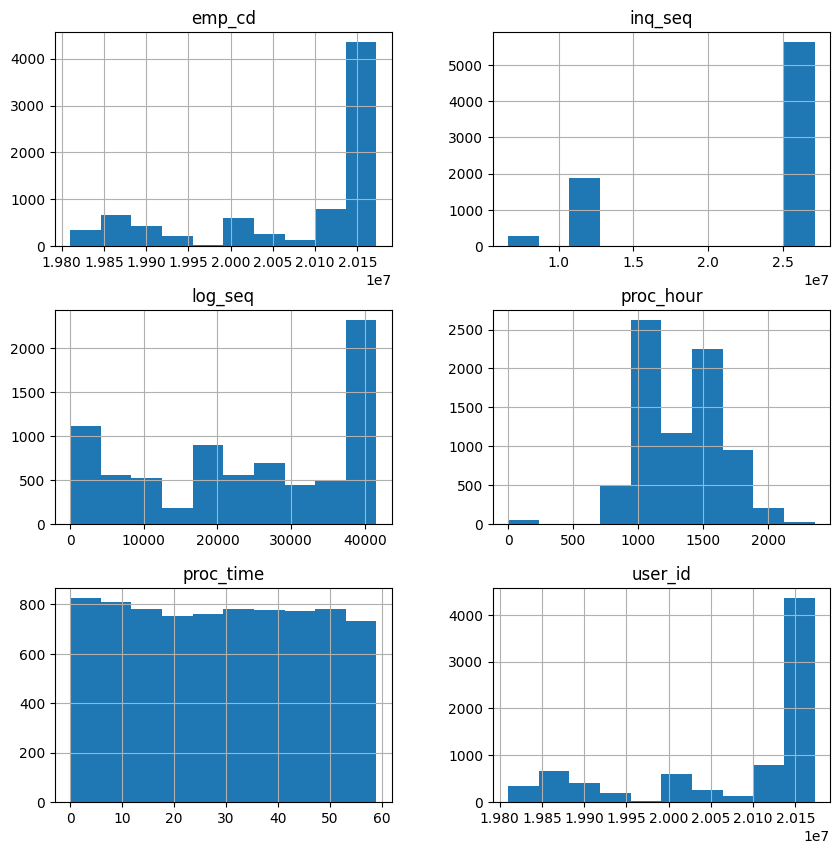

In [60]:
pd_biz_log.select_dtypes(include=np.number).hist(figsize=[10,10])
plt.show()

In [61]:
oml_biz_log.select_dtypes(include=np.number).hist(figsize=[10,10])
plt.show()

ValueError: hist method requires numerical columns, nothing to plot.

### Opensearch utilities

In [64]:
oml_biz_log2 = oml_biz_log[(oml_biz_log.OriginAirportID == 'AMS') & (oml_biz_log.FlightDelayMin > 60)]
oml_biz_log2 = oml_biz_log2[['timestamp', 'OriginAirportID', 'DestAirportID', 'FlightDelayMin']]
oml_biz_log2 = oml_biz_log2.tail()

In [65]:
print(oml_biz_log2.os_info())

os_index_pattern: flights
Index:
 os_index_field: _id
 is_source_field: False
Mappings:
 capabilities:
                   os_field_name  is_source os_dtype                  os_date_format        pd_dtype  is_searchable  is_aggregatable  is_scripted aggregatable_os_field_name
timestamp              timestamp       True     date  strict_date_hour_minute_second  datetime64[ns]           True             True        False                  timestamp
OriginAirportID  OriginAirportID       True  keyword                            None          object           True             True        False            OriginAirportID
DestAirportID      DestAirportID       True  keyword                            None          object           True             True        False              DestAirportID
FlightDelayMin    FlightDelayMin       True  integer                            None           int64           True             True        False             FlightDelayMin
Operations:
 tasks: [('boolean_f